<a href="https://colab.research.google.com/github/AlgorithmsAroundYou/PredictiveAINoteBooks/blob/main/tensorflow_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Keras Demo

## import liberies

In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(keras.__version__)

2.15.0


### Load the data and split it between train and test sets

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


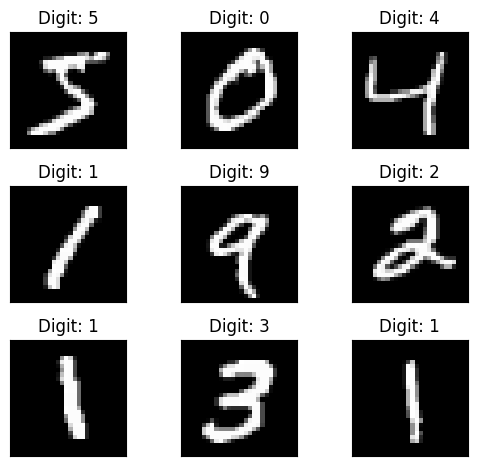

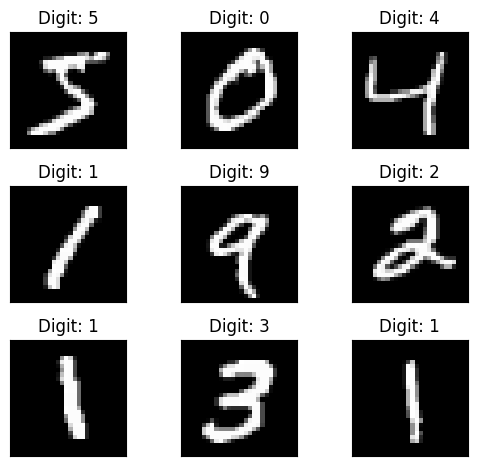

In [4]:
fig = plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [5]:
print("x_train shape:: ", x_train.shape)
print("y_train shape:: ", y_train.shape)
print("x_test shape:: ", x_test.shape)
print("y_test shape:: ", y_test.shape)
print("x_train type", type(x_train))
print("y_train type", type(y_train))
print("x_test type", type(x_test))
print("y_test type", type(y_test))
print("x_train dtype", x_train.dtype)
print("y_train dtype", y_train.dtype)
print("x_test dtype", x_test.dtype)
print("y_test dtype", y_test.dtype)
print("x_train ndim", x_train.ndim)
print("y_train ndim", y_train.ndim)
print("x_test ndim", x_test.ndim)
print("y_test ndim", y_test.ndim)
print("x_train size", x_train.size)
print("y_train size", y_train.size)
print("x_test size", x_test.size)
print("y_test size", y_test.size)
print("x_train itemsize", x_train.itemsize)
print("y_train itemsize", y_train.itemsize)
print("x_test itemsize", x_test.itemsize)
print("y_test itemsize", y_test.itemsize)



x_train shape::  (60000, 28, 28)
y_train shape::  (60000,)
x_test shape::  (10000, 28, 28)
y_test shape::  (10000,)
x_train type <class 'numpy.ndarray'>
y_train type <class 'numpy.ndarray'>
x_test type <class 'numpy.ndarray'>
y_test type <class 'numpy.ndarray'>
x_train dtype uint8
y_train dtype uint8
x_test dtype uint8
y_test dtype uint8
x_train ndim 3
y_train ndim 1
x_test ndim 3
y_test ndim 1
x_train size 47040000
y_train size 60000
x_test size 7840000
y_test size 10000
x_train itemsize 1
y_train itemsize 1
x_test itemsize 1
y_test itemsize 1


### Scale images to the [0, 1] range

In [6]:
x_train = x_train.astype('float32') / 255
y_train = y_train.astype('float32') / 255


#### Make sure images have shape (28, 28, 1)

In [7]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [8]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples


## Model parameters

In [9]:
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential()
model.add(keras.layers.Input(shape=input_shape))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_classes, activation="softmax"))



In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 global_average_pooling2d (  (None, 64)                0         
 GlobalAveragePooling2D)                                

## Compile model

In [11]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


## Train Model

In [12]:
batch_size = 128
epochs = 10

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=2),
]

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.15, callbacks=callbacks)

Epoch 1/10
399/399 [==============================] - 11s 25ms/step - loss: 0.0347 - accuracy: 0.0984 - val_loss: 0.0000e+00 - val_accuracy: 0.0990
Epoch 2/10
399/399 [==============================] - 9s 24ms/step - loss: 2.8833e-06 - accuracy: 0.0987 - val_loss: 0.0000e+00 - val_accuracy: 0.0990
Epoch 3/10
399/399 [==============================] - 9s 24ms/step - loss: 2.5189e-07 - accuracy: 0.0987 - val_loss: 0.0000e+00 - val_accuracy: 0.0990


In [13]:
print(history.history.keys())
print(history.history['accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0.09841176122426987, 0.09866666793823242, 0.09866666793823242]


In [14]:
## plotting the metrics

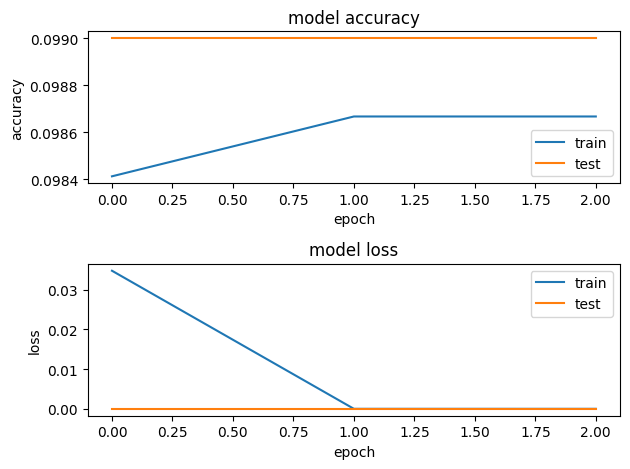

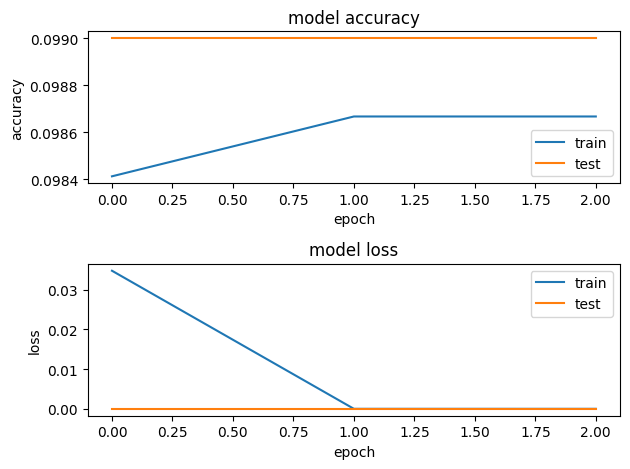

In [15]:
fig = plt.figure()
xc = range(epochs)
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()



fig

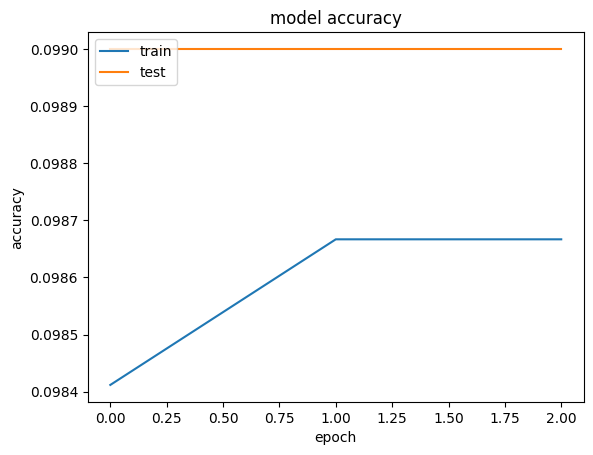

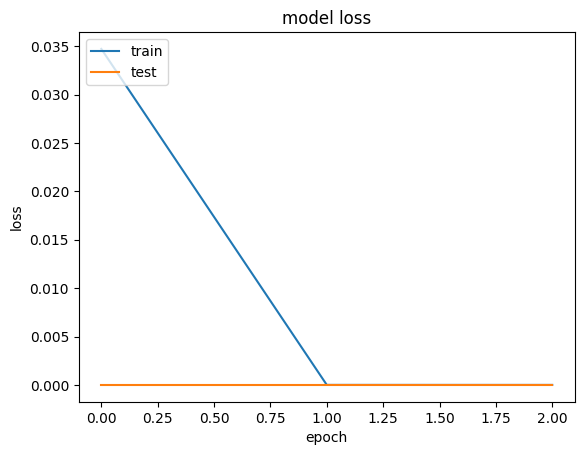

In [16]:
# summarize training for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 17257.380859375
Test accuracy: 0.09799999743700027


In [30]:
predictions = model.predict(x_test)


313/313 [==============================] - 1s 4ms/step


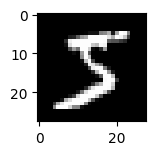

In [31]:
#print(x_test[0])
plt.subplot(330 + 1)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.show()


[[0.99999994 0.         0.         ... 0.         0.         0.        ]
 [0.99999994 0.         0.         ... 0.         0.         0.        ]
 [0.99999994 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.99999994 0.         0.         ... 0.         0.         0.        ]
 [0.99999994 0.         0.         ... 0.         0.         0.        ]
 [0.99999994 0.         0.         ... 0.         0.         0.        ]]


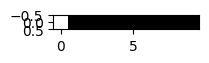

In [32]:
print(predictions)
plt.subplot(330 + 1)
plt.imshow([predictions[0]], cmap=plt.get_cmap('gray'))
plt.show()